#### Gradient boosting tutorial

As ensemble model is really powerful than just one model, the ensemble contain two parts: bagging and boosting, the bagging algorithm representation is RandomForest algorithm, and the boosting algorithm representation is gradient boosting.
The difference between bagging and boosting is that for the bagging criteria is to use the voting or averaging method, and the boosting is to fit the model and the sequencial model residual. The gradient boosting means that for the next model is to fit on the residual multiply with the learning rate. Here is just to implement this with DecisonTree combined using sklearn module.

In [15]:
# there is to use the digits dataset
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

# x, y = load_digits(return_X_y=True)
# just random some dataset
x, y = np.random.randn(10000, 3), np.random.random(10000, )

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=1234)

In [16]:
# define the rmse function
def rmse_loss(y, pred):
    return np.sqrt(metrics.mean_squared_error(y, pred))

In [17]:
train_rmse_list = []
test_rmse_list = []
model_list = []
res_list = []

n_trees = 30

ytrain_data = ytrain.copy()

# loop for the n_trees 
for i in range(n_trees):
    if i % 5 == 0:
        print("training step: ", i)
    
    dt = DecisionTreeRegressor()
    
    if i == 0:
        # model should fit on the train and train label
        dt.fit(xtrain, ytrain_data)
        pred = dt.predict(xtrain)
        train_rmse_list.append(rmse_loss(ytrain, pred))
        pred_test = dt.predict(xtest)
        test_rmse_list.append(rmse_loss(ytest, pred_test))
        residual = ytrain_data - pred
    else:
        # if not the first time to fit the model should fit on the residual, and the prediction is based on the previous
        # model training model prediction and combined with residual
        # train_data += residual
        dt.fit(xtrain, residual)
        # change the prediction
        pred += dt.predict(xtrain)
        train_rmse_list.append(rmse_loss(ytrain, pred))
        pred_test = dt.predict(xtest)
        test_rmse_list.append(rmse_loss(ytest, pred_test))
        residual = ytrain - pred
    
    model_list.append(dt)
        
    

training step:  0
training step:  5
training step:  10
training step:  15
training step:  20
training step:  25


No handles with labels found to put in legend.


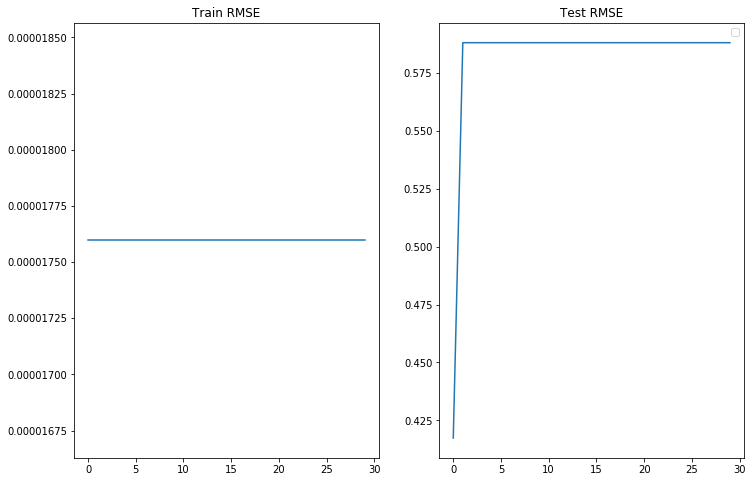

In [18]:
# plot the train rmse and test rmse
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].plot(train_rmse_list)
ax[0].set_title("Train RMSE")

ax[1].plot(test_rmse_list)
ax[1].set_title("Test RMSE")

plt.legend()
plt.show()